<a href="https://colab.research.google.com/github/mahima67/Btech-project-/blob/main/Mech_Zehnder_Interferometer_with_experiment_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the interference pattern image
img = cv2.imread('intereference images cropped.png')


In [ ]:


# Set the path to the image file
img_path = '/content/drive/MyDrive/Colab Notebooks/intereference images cropped.png'
# Check if the file exists
if os.path.isfile(img_path):
    # File exists, read the image
    import cv2
    img = cv2.imread(img_path)
    # Further processing code here
else:
    # File does not exist
    print('Error: Image file does not exist.')

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to the image to separate the fringes from the background
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Apply a Gaussian blur to the image to remove noise
blur = cv2.GaussianBlur(thresh, (5,5), 0)
print(f'Data used after blurring: {blur}')

Data used after blurring: [[116 145 197 ... 247 253 255]
 [ 88 123 183 ... 234 250 255]
 [ 46  86 152 ... 211 245 255]
 ...
 [ 20  32  45 ... 140 196 215]
 [ 42  52  66 ... 110 162 185]
 [ 60  72  90 ... 102 151 175]]


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the input images to the correct shape and type
x_train = np.expand_dims(x_train.astype(np.float32) / 255.0, axis=-1)

# Define a neural network to classify the MNIST digits
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the MNIST dataset
model.fit(x_train, y_train, epochs=5)

# Evaluate the trained model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1508 - accuracy: 0.9549
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0515 - accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0319 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0143 - accuracy: 0.9955
313/313 - 2s - loss: 51.9392 - accuracy: 0.9508 - 2s/epoch - 6ms/step
Test accuracy: 0.9508000016212463


In [ ]:
# Resize the image to the target shape
blur_resized = cv2.resize(blur, (28, 28), interpolation=cv2.INTER_AREA)

# Reshape the input data to match the expected input shape of the model
blur_resized = np.reshape(blur_resized, (-1, 28, 28, 1))

# Make a prediction using the reshaped input data
predictions = model.predict(blur_resized)

# Use the trained model to classify new interference patterns
classifications = model.predict(blur_resized)

# Segment the interference pattern into regions of interest
fringes = cv2.Canny(blur_resized, 100, 200)
background = cv2.bitwise_not(fringes)

# Measure the fringe spacing and other features of the interference pattern
fringe_spacing = np.mean(np.diff(np.where(fringes == 255)[1]))

1/1 [==============================] - 0s 35ms/step


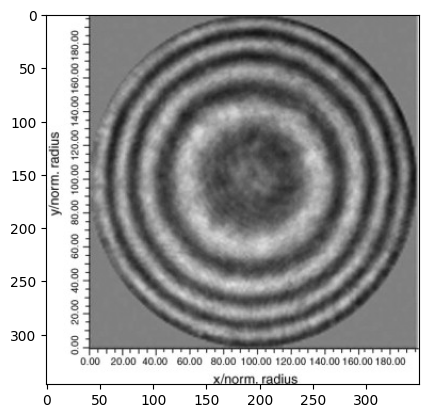

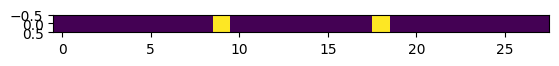

Fringe spacing: 9.0


In [ ]:

# Load the interference pattern image
img_path = '/content/drive/MyDrive/Colab Notebooks/intereference images.png'
img = cv2.imread(img_path)

# Check if the image is not None
if img is not None:
    # Show the interference pattern image
    plt.imshow(img)
    plt.show()
else:
    print('Error: Image could not be loaded.')

# show the segmented interference pattern into regions of interest
plt.imshow(fringes)
plt.show()

# print the fringe spacing
print(f"Fringe spacing: {fringe_spacing}")